In [166]:
import pandas as pd
import spacy
import re
from spacy.matcher import Matcher 
from word2number import w2n
from spacy import displacy 
from IPython.display import Image, display
import numpy as np
import statistics
import pandas as pd
from ast import literal_eval
from cdqa.utils.filters import filter_paragraphs
from cdqa.utils.download import download_model, download_bnpp_data
from cdqa.pipeline.cdqa_sklearn import QAPipeline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

In [270]:
nlp = spacy.load('en_core_web_sm',disable=['textcat'])

## Incubation Period

In [3]:
ip1 = pd.read_csv("incubation_period.csv")
ip2 = pd.read_csv("incubation_period2.csv")
ip3 = pd.read_csv("incubation_period3.csv")

In [248]:
incubation_period = pd.DataFrame()
incubation_period = incubation_period.append(ip1)
incubation_period = incubation_period.append(ip2)
incubation_period = incubation_period.append(ip3)

In [253]:
unqiue_titles = set(incubation_period.title)

In [250]:
incubation_period = incubation_period.loc[incubation_period.title.isin(unqiue_titles)].reset_index(drop = True)

In [251]:
len(incubation_period)

8357

In [101]:
incubation_period.columns

Index(['sentence_id', 'from', 'to', 'title', 'article_link',
       'from_first_index', 'from_last_index', 'to_first_index',
       'to_last_index', 'sentence_text', 'paragraph_text', 'year', 'journal',
       'source', 'section', 'pmc_id', 'doi', 'pdf_sha', 'pubmed_id',
       'msft_id'],
      dtype='object')

In [102]:
incubation_period.to_csv("final_ib.csv")

In [127]:
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    text = re.sub(",",'',str(text))
    text = re.sub("±",' ',str(text))
    text = re.sub("∼",'',str(text))
    text = re.sub("·",' ',str(text))
    text = re.sub("–",' ',str(text))
    text = re.sub("d=",' ',str(text))
    text = re.sub("/",' ',str(text))
    text = re.sub("~",'',str(text))
    text = re.sub("À",' ',str(text))
    text = re.sub("e",' ',str(text))
    outliers = ['b','II','2a','3Á0','3=42','5−','ly']
    for word in outliers:
        text = re.sub(word, " ",str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].,*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
incubation_period['sentence_text'] = incubation_period['sentence_text'].apply(clean)

In [263]:
def posFirstArticle(tokens):
    listOfArticles = set(['a','an','the'])
    for i,word in enumerate(tokens,1):
        if word.lower() in listOfArticles:
            return str(i)
    return str(0)

def finding_days(incubation_period):
    cdqa_pipeline = QAPipeline(reader='models/bert_qa_vCPU-sklearn.joblib')
    cdqa_pipeline.fit_retriever(X=incubation_period.sentence_text)
    days =[]
    for i in range(len(incubation_period)):
        doc = nlp(incubation_period.sentence_text[i])
        day = []
        for j in range(len(doc)):
            if str(doc[j]) == "days":
                for k in range(j,(j-5), -1):
                    if doc[k].pos_ == "NUM":
                        day.append(doc[k])
        days.append(day)

In [ ]:
days = finding_days(incubation_period)

In [129]:
for i in range(len(incubation_period)):
               print(incubation_period.sentence_text[i])

Epid miological studi s [ 3  4 ] hav  found that in Hong Kong : th  fatality rat  was approximat   17 % ( compar d to 11 % glo al  ) ; th  m an incu ation p riod was 6.4 days ( rang  2   10 ) [ 5 ] ; th  duration   tw  n ons t of symptoms and hospitalization was 3   5 days ; and th  m an num  r of individuals inf ct d  y  ach cas  during th  initial phas  of th   pid mic was 2.7 [ 2 ] .
Th  incu ation p riod is 5   7 days ( Ganaway  1976 ) .
Th  incu ation p riod of this viral inf ction is 2 to 14 days [ 18 ]  with a m an of approximat   5 days   as d on th  pr s nt data [ 19 ] .
Clinical signs involv d a flaccid para sis and w ight loss with an incu ation p riod of 9   23 days  and a duration of 1   2 w  ks .
W   stimat d th  w  k  r production num  r  consid ring th  r port d m dian incu ation p riod of 5 to 6 days .
Th  incu ation p riod rang s from 33 to 49 days ( 87 ) .
An individual  xpos d to SARS may   com  inf ctious aft r an incu ation p riod of 2   7 days ( or long r ) ( CDC

As th  incu ation p riod of COVID 19 is up to 14 days  th  virus can    transmitt d to oth r p opl  during this tim  p riod 14  15 .
Th  av rag  pr  symptomatic p riod ( as part of th  incu ation p riod ) is consid ra   short r in influ nza inf ction ( 0.2   1 days ) [ 41  42 ] than in COVID 19 ( 2.3 days ) [ 23 ] .
Th  incu ation p riod is 2 5 days   ut spor s can g rminat  up to 60 days aft r  xposur  .
Th  incu ation p riod of this dis as  is 1   14 days or  v n long r [ 24 ] .
Th  incu ation p riod is 2   10 days .
Th  incu ation p riod of approximat   12   30 days  d p nding on th  sp cific plasmodium involv d .
Incu ation p riod in human is 5   14 days .
Th  incu ation p riod is 1 to 4 days  and symptoms includ  cough  f v r  malais   coryza  h adach   and myalgias .
W  k  lags ar  us d   caus  th  incu ation p riod COVID 19 is thought to    5   6 days .
COVID 19 is high  contagious and transmissi l  from human to human  with an incu ation p riod of up to 24 days [ 6 ] .
Th  incu

Th  curr nt data sugg st an incu ation p riod of 1   14 days  in most cas s 3   7 days .
Th  incu ation p riod rang d from 2   14 days .
For  xampl   gastro nt ritis may follow 8   36 h aft r ing stion of contaminat d food  wh r as typhoid follows an incu ation p riod of 10   20 days .
Aft r an incu ation p riod of 1   14 days  COVID 19 shows a mild cours  in 80â% of o s rv d cas s and a s v r  cours  in 20â%  with a l thality rat  of 0.3   5.8â% .
Th  incu ation p riod is 2   7 days and diarrho a occurs aft r  act rial r plication in th  upp r small int stin  ( j junum ) .
Th  incu ation p riod of th  inf ction rang s from 0 to 24 days [ 27 ] .
[ 9 ] Fiv  of th  includ d studi s r port d data on covid 19 incu ation p riod  with th  minimum and maximum incu ation p riod r port d in studi s ranging from 3 to 6.7 days .
Th  incu ation p riod of 42   60 days  som tim s up to 90 days  is similar to som  oth r viral caus s of h patitis .
With  xp rim ntal transmission using fr sh  loo

Its incu ation p riod rang d from 2   13 days ( Col man and Fri man  2013 ) .
Curr nt information indicat s that th  av rag  incu ation p riod for COVID 19 is 5.1 days ( 95 % CI 4.5   5.8 days ) and that 97.5 % of cas s d v lop d symptoms in 11.5 days ( 95 % CI : 8.2   15.6 days ) .
Giv n its incu ation p riod of 5   8 days  it was hypoth siz d that viral sh dding of ad novirus into th   nvironm nt might    d t ct d   for  larg  num  rs of individuals   com  symptomatic  thus pot ntial  pr dicting out r aks .
Th  incu ation p riod rang d   tw  n 2   5 days ( L ssl r  t al.  2009 ) .
Its incu ation p riod is 2   10 days ( World H alth Organization  2003 ) .
SARS CoV 2 incu ation p riod is up to two w  ks  usual  ranging from thr   to s v n days aft r inf ction .
Th  m an incu ation p riod is a out 5 days ( 1   14 days ) [ 10 ] .
HPIV also r tains its inf ctivity on inanimat  o j cts for up to 10 hours 10 and its incu ation p riod as found in volunt  r studi s was  stimat d at 3   6 days

This r sult corr sponds w ll with th  m an incu ation p riod of COVID 19  which was  stimat d to    5   6 days [ 8  9  10 ] .
This r sult is r l vant sinc  th  m an incu ation p riod of COVID 19 is known to    around 5   6 days [ 8 ] .
Th  RT PCR t st of th  pati nt r sult d n gativ    ut aft r discussion with th  National Coordination C nt r and consid ring th  r comm ndations of th  Sci ntific Advisory Board  w  d cid d to r p at th  t st   caus  of th  incu ation p riod of s v r  acut  r spiratory syndrom  coronavirus 2 ( SARS CoV 2 ) .
W  hav  to highlight th  fact that th  tim  t = 30 is count d from th  first Inf ct d su j ct in a million population   ut du  to d lay ( th  incu ation p riod  f w mor  days of asymptomatic dis as   t st duration to confirm positivity ) first COVID 19 pati nts in a n w country w r  confirm d aft r around 10 days .
W  start d mod ling th  Wuhan COVID 19 out r ak with th  standard SEIR mod l with WHO pr mis d  asic r production num  r R 0   tw  n 2 an

Th  incu ation p riod of COVID 19 can    1 to 14 days  ut is usual  3 to 7 days .
Th  incu ation p riod of SARS CoV 2 inf ction is g n ral  3   7 days .
Stag  1 is r lat d to th  virus  incu ation p riod  which can    d t ct d or not  and with th  a s nc  of COVID 19′s symptoms as w ll .
Th r  is g n ral agr  m nt that th  incu ation p riod of COVID 19 is   tw  n fiv  and six days [ 25 ] [ 26 ] [ 27 ] and is approximat   thr   days long r than th  lat nt p riod 23 .
Mor  compl x dynamics  including chaotic  aris  in th  diff r nt logistic  quation or wh n th  d lay for th  incu ation p riod is account d for [ 10 ]  [ 11 ]  [ 12 ]  [ 13 ]  [ 14 ]  and th s  mod ls ar  also us d to int rpr t and for cast COVID 19 [ 15 ]  [ 16 ]  [ 17 ] .
Th s  findings highlight th  pot ntial importanc  of  nvironm ntal contaminations ( air  liquid  and solid surfac s ) for th  diss mination of SARS CoV 2 in th  population   sp cial  giv n that und t ct d viral sh dding  y asymptomatic  pr  symptomatic (

But in th  COVID 19 spr ad r lat d works in which th  SEIR mod l was us d it was appar nt  pr sum d that within th  incu ation p riod th  inf ct d individuals ar  not carri rs of th  dis as  .
At δt< 7 as display d  y th   lack lin   th  slop  of r UV is   low th  shadow  which is attri uta l  to th  incu ation p riod of COVID 19 .
A d lay d modulation of solar radiation on th  COVID 19 transmission r fl cts an incu ation p riod
Th  variations of socio conomic factors ar  ov rall at t mporal scal s much long r than that of th  d lay  which can n ith r modulat  th  COVID 19 nor r spond to th  UV flux at th  tim  scal  of th  incu ation p riod .
W  us  th s  clust rs to  stimat   oth incu ation p riod and s rial int rval for COVID 19  in  oth datas ts  and discuss th  implications of our findings for R0  stimat s and pr  symptomatic transmission .
In conclusion  in  oth th  Singapor  and Tianjin COVID 19 clust rs w  id ntifi d  oth th  incu ation p riod and th  s rial int rval .
Th  incu

Conclusions : Th  adol sc nt and young adult pati nts of COVID 19 had a long incu ation p riod  and a short s rial int rval .
Th  m dian of th  incu ation p riod of COVID 19 was 6.50 days  th  av rag  g n ration int rval was 5 days  and th  hous hold s condary transmission rat  was 20.46 % .
3 COVID 19 d v lops with th  clinical pr s ntation of pn umonia and inf ction  with an approximat  incu ation p riod of 2 to 14 days .
Also  of conc rn is th  pr symptomatic transmissi ility for COVID 19  during th  incu ation p riod up to 14 days  with th  m an of 5   6 days which has    n docum nt d  y aggr ssiv  r connaissanc  of clust rs of confirm d pati nts .
Th  m dian incu ation p riod of COVID 19 was  stimat d to    5.1 d  97.5th p rc ntil  was 11.5 d  5  as d on  pid miological charact ristics it  r asona l  to sp culat  that h  d v lop d a lat nt inf ction of SARS CoV 2 prior op ration and str ss inflict d  y n urosurgical proc dur  and an sth sia 6 and pot ntial postop rativ  hypopituit

Th  COVID 19 is a dang rous virus    caus  th  incu ation p riod of th  COVID 19 is at l ast 14 days [ 7 ]  and it can spr ad to oth rs in th  incu ation p riod .
T st  ffici ncy is th  p rc ntag  of p opl  who   cam  symptomatic aft r th  av rag  incu ation p riod who 'v  t st d positiv  for COVID 19 .
Th  incu ation p riod of COVID 19 has    n  stimat d at 4   7 days on av rag    ut th r  is  vid nc  that it could    as long as 14 days [ 8 ]  which is now th  common  adopt d duration for m dical o s rvation or quarantining .
Although pati nts with symptomatic COVID 19 hav     n th  main sourc  of transmission  r c nt o s rvations hav  sugg st d that asymptomatic su j cts as w ll as pati nts within th  incu ation p riod ar  also carri rs of 2019 nCoV [ 9 ] .
Th  s rial int rval is d fin d as th  int rval   tw  n a primary cas  of COVID 19 d v loping symptoms and a s condary cas  d v loping symptoms  wh r as th  incu ation p riod is th  tim  lag   tw  n inf ction and th  start of sympt

In [139]:
for i in range(len(days)):
    for j in range(len(days[i])):
        try:
            days[i][j] = float(str(days[i][j]))
        except:
            days[i][j] = w2n.word_to_num(str(days[i][j]))

In [142]:
for i in range(len(days)):
    try:
        days[i] = statistics.mean(days[i]) 
    except:
        pass

In [147]:
incubation_period['days'] = days

In [152]:
x = []
for i in range(len(days)):
    if days[i]:
        x.append(days[i])

In [153]:
incubation_period = incubation_period.loc[incubation_period['days'].isin(x)].reset_index(drop = True)

In [161]:
incubation_period = incubation_period.loc[incubation_period['days'] <= 50].reset_index(drop = True)

In [162]:
len(incubation_period)

6198

In [155]:
mean_IB = statistics.mean(incubation_period['days'])

In [156]:
mean_IB

9.783202129773136

In [191]:
std = incubation_period['days'].std()
std

5.036338433743748

In [164]:
incubation_period = incubation_period.sort_values('days')

In [168]:
days = incubation_period['days'].astype(int)
C = Counter(days)
C

Counter({0: 3,
         1: 54,
         2: 187,
         3: 256,
         4: 532,
         5: 821,
         6: 862,
         7: 672,
         8: 938,
         9: 335,
         10: 239,
         11: 164,
         12: 246,
         13: 84,
         14: 420,
         15: 52,
         16: 34,
         17: 32,
         18: 20,
         19: 38,
         20: 23,
         21: 24,
         22: 11,
         23: 17,
         24: 47,
         25: 6,
         26: 1,
         27: 6,
         28: 6,
         29: 3,
         30: 11,
         31: 7,
         32: 7,
         33: 4,
         35: 2,
         36: 5,
         37: 3,
         38: 7,
         39: 2,
         40: 6,
         41: 2,
         42: 2,
         43: 1,
         45: 3,
         46: 1,
         48: 1,
         50: 1})

Text(164.34722222222223, 0.5, '\n Y-axis : Number of Papers \n ')

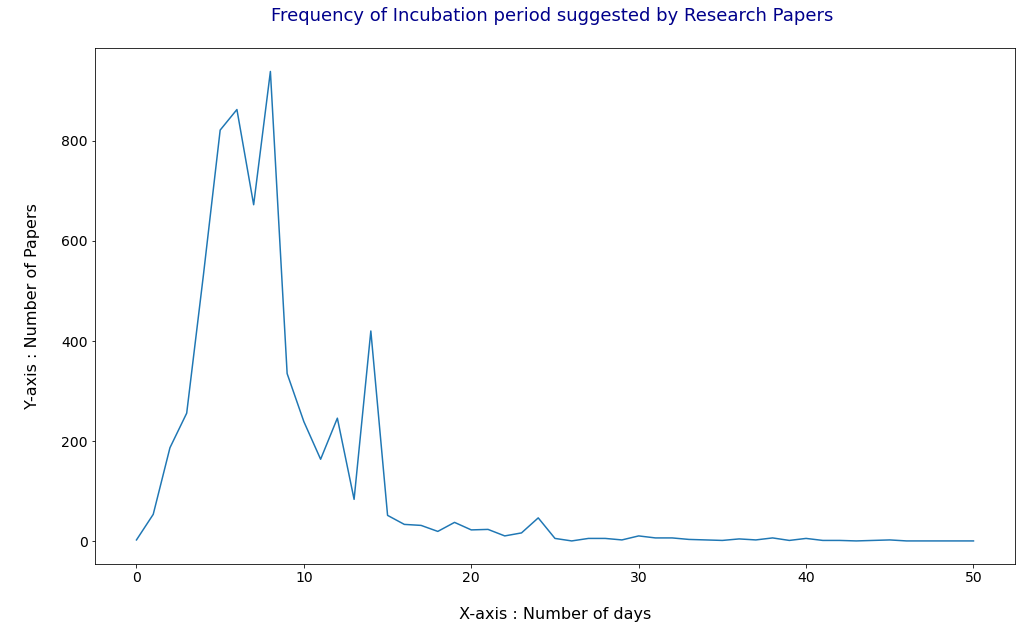

In [189]:
ax1 = plt.plot(list(C.keys()),list(C.values()))
fig = plt.gcf()
fig.set_size_inches(16.5, 9.5)
fig.savefig('IB_days.png', dpi=100)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.title('Frequency of Incubation period suggested by Research Papers \n ',loc='center',fontsize = 18,color = 'darkblue')
plt.xlabel('\n X-axis : Number of days ', fontsize =16)
plt.ylabel('\n Y-axis : Number of Papers \n ', fontsize =16)

In [244]:
pagerank = pd.read_csv("final_ib_page_rankings_title.tsv", sep='\t')
pagerank.columns

Index(['title', 'doi', 'pagerank'], dtype='object')

In [276]:
incubation_period = pd.merge(incubation_period, pagerank, on  = "title")

In [240]:
incubation_period['pagerank'] = pagerank['pagerank']

In [246]:
incubation_period['weighted_days'] = [incubation_period['pagerank_y'][i] * incubation_period['days'][i] for i in range(len(incubation_period))] 

In [255]:
mean_days_weighted = incubation_period['weighted_days'].sum()
mean_days_weighted

9.2540153


## Contagious Period

In [260]:
contagious_period = pd.read_csv("contagious_period.csv")

In [261]:
contagious_period['sentence_text'] = clean(contagious_period['sentence_text'])

In [271]:
days = finding_days(contagious_period)

In [273]:
for i in range(len(days)):
    for j in range(len(days[i])):
        try:
            days[i][j] = float(str(days[i][j]))
        except:
            days[i][j] = w2n.word_to_num(str(days[i][j]))

In [274]:
for i in range(len(days)):
    try:
        days[i] = statistics.mean(days[i]) 
    except:
        pass

In [275]:
mean_CP = statistics.mean(contagious_period['days'])
mean_CP

4.256944


In [277]:
std = contagious_period['days'].std()
std

2.12689


In [278]:
pagerank = pd.read_csv("final_cp_page_rankings_title.tsv", sep='\t')
pagerank.columns

Index(['title', 'doi', 'pagerank'], dtype='object')


In [279]:
contagious_period = pd.merge(contagious_period, pagerank, on  = "title", how = "inner")

In [280]:
contagious_period['pagerank'] = pagerank['pagerank']

In [282]:
incubation_period['weighted_days'] = [incubation_period['pagerank_y'][i] * incubation_period['days'][i] for i in range(len(incubation_period))] 

In [283]:
mean_days_weighted = incubation_period['weighted_days'].sum()
mean_days_weighted

5.05989
